In [16]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from plotting import plot_results

In [17]:
def generate_dataset():
    num_class1 = 50
    num_class2 = 50
    cov1 = np.array([[1, 0], [0, 2]])
    mean1 = np.array([0, 0])
    cov2 = np.array([[2, 0], [0, 1]])
    mean2 = np.array([2, 2])
    data1 = np.random.multivariate_normal(
        mean1, cov1, num_class1
    )
    data2 = np.random.multivariate_normal(
        mean2, cov2, num_class2
    )
    data = np.concatenate((data1, data2), axis=0)
    classes = np.array(
        [0 for i in range(num_class1)] +
        [1 for i in range(num_class2)]
    )
    return data, classes

In [18]:
x, y = generate_dataset()

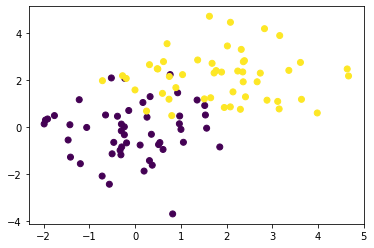

In [19]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [20]:
n_components = 2

gauss = GaussianMixture(
    n_components=n_components,
    covariance_type="diag"
)
gauss.fit(x)

print(f"Model converged: {gauss.converged_}")

Model converged: True


In [21]:
covs = gauss.covariances_
means = gauss.means_

print(f"Cov[0]:\n{np.diag(covs[0])}")
print(f"Cov[1]:\n{np.diag(covs[1])}")

print(f"Means[0]:\n{means[0]}")
print(f"Means[1]:\n{means[1]}")

Cov[0]:
[[1.53799647 0.        ]
 [0.         1.14384305]]
Cov[1]:
[[0.85367686 0.        ]
 [0.         1.30272725]]
Means[0]:
[1.76599956 2.00449217]
Means[1]:
[-0.19244702 -0.31634921]


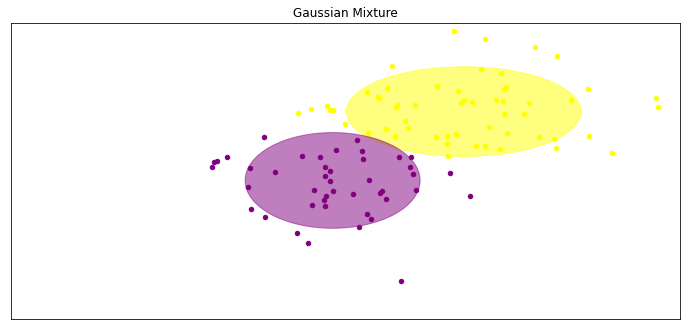

In [22]:
cov1 = np.diag(covs[0])
cov2 = np.diag(covs[1])

plot_results(
    x, y, gauss.predict(x), means,
    [cov1, cov2], 0, "Gaussian Mixture"
)